In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

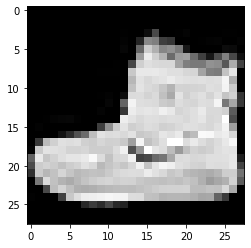

In [3]:
# Visualize a sample image
plt.imshow(x_train[0], cmap = 'gray')

In [4]:
# check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# check out the shape of the testing data
x_test.shape

(10000, 28, 28)

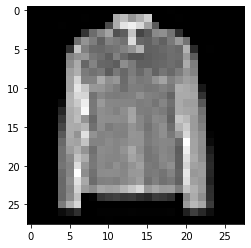

In [6]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(x_train[i], cmap = 'gray')

In [7]:
label = y_train[i]
label


4

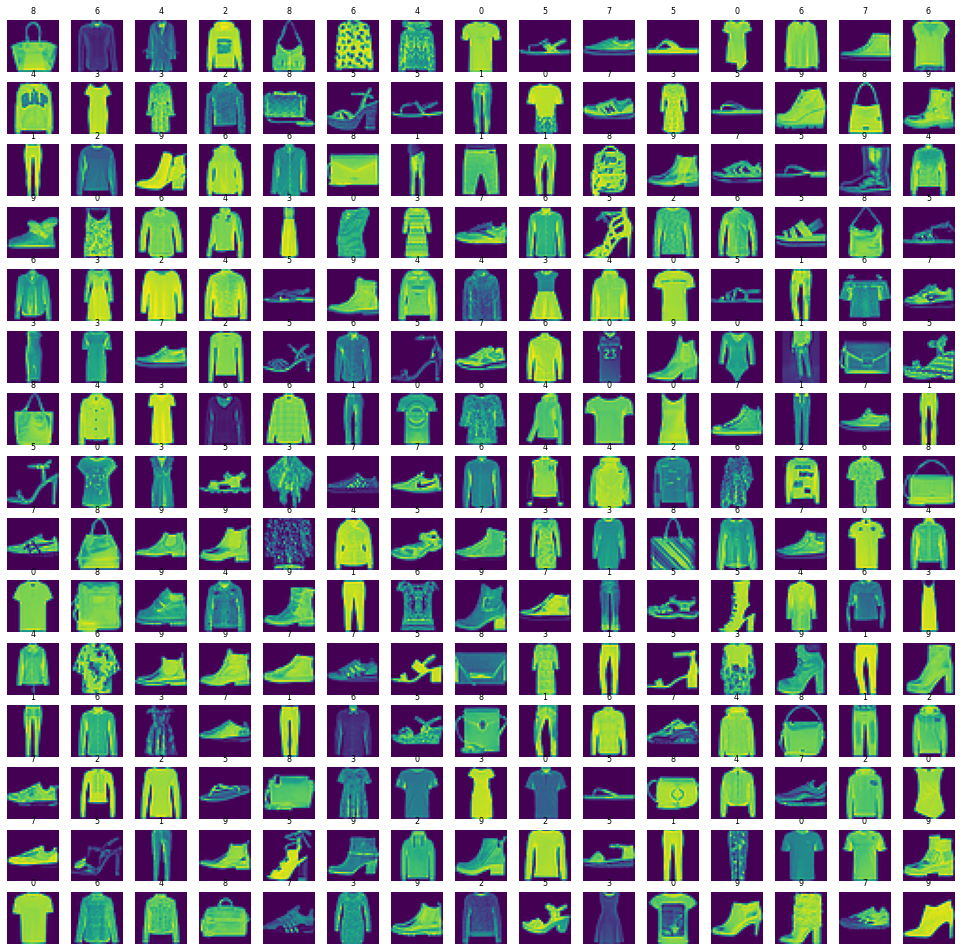

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off') #Turn off the indicator of the x axis and y axis


# TASK #4: PERFORM DATA PREPROCESSING

In [9]:
# normalize data
x_train = x_train/255
x_test = x_test/255

In [11]:
# add some noise
noise_factor = 0.3
noise_dataset = []
for img in x_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

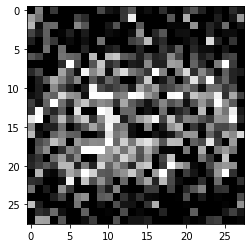

In [19]:
noise_dataset = np.array(noise_dataset)
plt.imshow(noise_dataset[2277], cmap = 'gray')

In [14]:
noise_factor = 0.2
noise_test_dataset = []
for img in x_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [20]:
noise_test_dataset = np.array(noise_test_dataset)
# add noise to testing dataset

In [16]:
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))

In [17]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 525us/sample - loss: 0.3995 - val_loss: 0.3197
Epoch 2/10
60000/60000 [==============================] - 30s 508us/sample - loss: 0.3167 - val_loss: 0.3080
Epoch 3/10
60000/60000 [==============================] - 31s 513us/sample - loss: 0.3104 - val_loss: 0.3036
Epoch 4/10
60000/60000 [==============================] - 31s 512us/sample - loss: 0.3070 - val_loss: 0.3002
Epoch 5/10
60000/60000 [==============================] - 31s 509us/sample - loss: 0.3046 - val_loss: 0.2981
Epoch 6/10
60000/60000 [==============================] - 31s 515us/sample - loss: 0.3033 - val_loss: 0.2964
Epoch 7/10
60000/60000 [==============================] - 32s 526us/sample - loss: 0.3024 - val_loss: 0.2957
Epoch 8/10
60000/60000 [==============================] - 32s 534us/sample - loss: 0.3017 - val_loss: 0.2949
Epoch 9/10
60000/60000 [==============================] - 32s 526us/sample - l

In [23]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print('Test loss: {:.3f}'.format(evaluation))

10000/10000 [==============================] - 3s 303us/sample - loss: 0.2940
Test loss: 0.294


In [24]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))

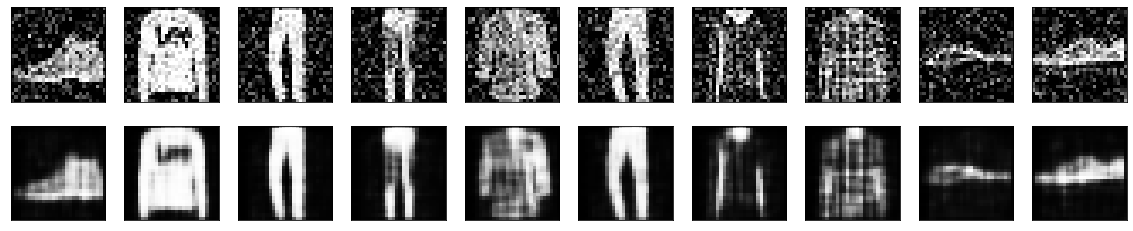

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)